# Analyzing a dataset

## Reading and wrangling data

Steps:
1) Load packages (install tidyverse if you haven't yet)
2) Read data
3) Look at data and find initial problems

### Load packages and read dataset

In [ ]:
# If you haven't installed tidyverse type the below
# install.packages("tidyverse")

library(tidyverse)

ufos <- read.csv(url("https://raw.githubusercontent.com/planetsig/ufo-reports/master/csv-data/ufo-scrubbed-geocoded-time-standardized.csv"), header = FALSE)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
head(ufos)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,4/27/2004,29.8830556,-97.941111
2,10/10/1949 21:00,lackland afb,tx,,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,12/16/2005,29.38421,-98.581082
3,10/10/1955 17:00,chester (uk/england),,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 England,1/21/2008,53.2,-2.916667
4,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home,1/17/2004,28.9783333,-96.645833
5,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan,1/22/2004,21.4180556,-157.803611
6,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl with us now 51 myself 49 and the other fellow which worked with my father if he&#39s still livi,4/27/2007,36.5950000,-82.188889


In [ ]:
tail(ufos)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
80327,9/9/2013 21:00,woodstock,ga,us,sphere,20,20 seconds,Driving 575 at 21:00 hrs saw a white and green bright sphere.Moved really fast up and down then it disappeared.,9/30/2013,34.1013889,-84.51944
80328,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors and hovering.,9/30/2013,36.1658333,-86.78444
80329,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 red lights&#44 seen by husband and wife.,9/30/2013,43.6136111,-116.20250
80330,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.28444
80331,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastly from rght to left.,9/30/2013,38.9011111,-77.26556
80332,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White Elongated-Cigar Shaped Flashing lights&#44 NW of Oklahoma City,9/30/2013,35.6527778,-97.47778


### What problems do we see?

1) no column names
2) All column types are character strings, at least duration shoudl be numeric and V1/V9 should be datetimes
3) V7 (duration by minutes seems inconsistent)
4) We might want duration by minutes and hours

In [ ]:
# fix column names

colnames(ufos) <- c('date_of_incident', 'city', 'state', 'country', 'shape',
                    'duration_seconds', 'duration_hrs_min', 'comments',
                    'date_posted', 'latitude', 'longitude')

# colnames lets you see or set column names. It's useful if you know the order of the
# columns and the names. If you don't then you might be best using the `rename()` function
# from tidyverse


In [ ]:
# fix data types, remove duration_hrs_min

ufos <- ufos %>%
   mutate(duration_seconds = as.numeric(duration_seconds),
          date_of_incident = mdy_hm(date_of_incident),
          date_posted = mdy(date_posted),
          latitude = as.numeric(latitude)
         ) %>%
   select(-duration_hrs_min)

# `mutate()` changes or adds a variable. From tidyverse
# `as.numeric()` casts the value to a numeric data type. It's from base R
# `mdy_hm()` changes the date-month-year hour:minute format to a datetime date type. From lubridate (tidyverse)
# `mdy()` changes the date-month-year format to a datetime data type. From lubridate (tidyverse)

Warning message:
"There were 2 warnings in `mutate()`.
The first warning was:
i In argument: `duration_seconds = as.numeric(duration_seconds)`.
Caused by warning:
! NAs introduced by coercion
i Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning."


In [ ]:
head(ufos)


,date_of_incident,city,state,country,shape,duration_seconds,comments,date_posted,latitude,longitude
,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<date>,<dbl>,<dbl>
1,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,2004-04-27,29.88306,-97.941111
2,1949-10-10 21:00:00,lackland afb,tx,,light,7200,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,2005-12-16,29.38421,-98.581082
3,1955-10-10 17:00:00,chester (uk/england),,gb,circle,20,Green/Orange circular disc over Chester&#44 England,2008-01-21,53.20000,-2.916667
4,1956-10-10 21:00:00,edna,tx,us,circle,20,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home,2004-01-17,28.97833,-96.645833
5,1960-10-10 20:00:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan,2004-01-22,21.41806,-157.803611
6,1961-10-10 19:00:00,bristol,tn,us,sphere,300,My father is now 89 my brother 52 the girl with us now 51 myself 49 and the other fellow which worked with my father if he&#39s still livi,2007-04-27,36.59500,-82.188889


In [ ]:
# add new columns for duration_hrs and duration_min and
# separate out the year, month, and hour
# we can also get the day of the week, week of the year, and quarter

# see: https://rawgit.com/rstudio/cheatsheets/main/lubridate.pdf

ufos <- ufos %>%
   mutate(duration_mins = round(duration_seconds / 60, 2), # round is new and this is rounding it to two decimal places
          duration_hrs = round((duration_seconds / 60) / 60, 2),
          year_incident = year(date_of_incident),
          month_incident = month(date_of_incident),
          hour_incident = hour(date_of_incident),
          day_of_week = wday(date_of_incident, label = TRUE),
          week_of_year = week(date_of_incident),
          quarter_of_incident = quarter(date_of_incident))


In [ ]:
head(ufos)

,date_of_incident,city,state,country,shape,duration_seconds,comments,date_posted,latitude,longitude,duration_mins,duration_hrs,year_incident,month_incident,hour_incident,day_of_week,week_of_year,quarter_of_incident
,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<ord>,<dbl>,<int>
1,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,2004-04-27,29.88306,-97.941111,45.00,0.75,1949,10,20,Mon,41,4
2,1949-10-10 21:00:00,lackland afb,tx,,light,7200,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,2005-12-16,29.38421,-98.581082,120.00,2.00,1949,10,21,Mon,41,4
3,1955-10-10 17:00:00,chester (uk/england),,gb,circle,20,Green/Orange circular disc over Chester&#44 England,2008-01-21,53.20000,-2.916667,0.33,0.01,1955,10,17,Mon,41,4
4,1956-10-10 21:00:00,edna,tx,us,circle,20,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home,2004-01-17,28.97833,-96.645833,0.33,0.01,1956,10,21,Wed,41,4
5,1960-10-10 20:00:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan,2004-01-22,21.41806,-157.803611,15.00,0.25,1960,10,20,Mon,41,4
6,1961-10-10 19:00:00,bristol,tn,us,sphere,300,My father is now 89 my brother 52 the girl with us now 51 myself 49 and the other fellow which worked with my father if he&#39s still livi,2007-04-27,36.59500,-82.188889,5.00,0.08,1961,10,19,Tue,41,4


### Taking a closer look at the categorical variables.

I like to use `table()` in R to do this. Table lets you quickly examine the individual values in dataset columns. It also lets you examine two or more making it easy to explore potential relationships between variables.



In [ ]:
table(ufos$shape, useNA = "ifany")


            changed  changing   chevron     cigar    circle      cone  crescent 
     1932         1      1962       952      2057      7608       316         2 
    cross  cylinder     delta   diamond      disk      dome       egg  fireball 
      233      1283         7      1178      5213         1       759      6208 
    flare     flash formation   hexagon     light     other      oval   pyramid 
        1      1328      2457         1     16565      5649      3733         1 
rectangle     round    sphere  teardrop  triangle   unknown 
     1297         2      5387       750      7865      5584 

In [ ]:
# You can also do state, city, etc. Anything categorical.
table(ufos$country, useNA = "ifany")


         au    ca    de    gb    us 
 9670   538  3000   105  1905 65114 

***There are lots of shapes, lets minimize the number of categories (at least for values with less than a hundred instances)***

In [ ]:
ufos <- ufos %>%
   mutate(shape = ifelse(shape == "", "unknown", shape),
          shape = ifelse(shape == "changed", "changing", shape),
          shape = ifelse(shape == "round", "sphere", shape),
          shape = ifelse(ufos$shape %in% c("crescent", "delta", "dome", "flare",
                                           "hexagon", "pyramid"), "other", shape)
          )

table(ufos$shape)


 changing   chevron     cigar    circle      cone     cross  cylinder   diamond 
     1963       952      2057      7608       316       233      1283      1178 
     disk       egg  fireball     flash formation     light     other      oval 
     5213       759      6208      1328      2457     16565      5662      3733 
rectangle    sphere  teardrop  triangle   unknown 
     1297      5389       750      7865      7516 

In [ ]:
# Now that we have the shapes, would there be a relationship between the shape of the
# ufo and the country?

table(ufos$shape, ufos$country, useNA = "ifany")

           
                     au    ca    de    gb    us
  changing    252     9    69     2    46  1585
  chevron      89     3    36     1     8   815
  cigar       262    15    74     3    60  1643
  circle      891    62   284    10   243  6118
  cone         40     6    10     0    13   247
  cross        25     1     9     0    10   188
  cylinder    161     9    53     3    30  1027
  diamond     154    10    40     3    43   928
  disk        736    50   198     6   102  4121
  egg         105    12    28     1    32   581
  fireball    682    34   218     9   117  5148
  flash       174     4    62     1    25  1062
  formation   286    20    98     3    60  1990
  light      1937   119   655    20   361 13473
  other       762    40   242     9   133  4476
  oval        448    30   130     7    86  3032
  rectangle   140    10    47     1    29  1070
  sphere      655    15   205     7   158  4349
  teardrop     88    10    22     0    38   592
  triangle    827    43   26

In [ ]:
# what about three dimensions?

table(ufos$shape, ufos$day_of_week, ufos$country)

, ,  = 

           
             Sun  Mon  Tue  Wed  Thu  Fri  Sat
  changing    29   34   37   34   33   48   37
  chevron      7   16   14   10   10   17   15
  cigar       45   26   38   26   45   34   48
  circle     132  132  110  110  113  128  166
  cone         7    8    9    3    2    6    5
  cross        7    2    2    1    2    5    6
  cylinder    22   17   25   22   24   24   27
  diamond     28   21   23   26   21   18   17
  disk       108   90  100  106   97  102  133
  egg         23   14   10   11   15   17   15
  fireball   126   81   81   91   81   81  141
  flash       25   26   16   22   27   23   35
  formation   39   28   35   33   40   50   61
  light      278  264  257  274  279  243  342
  other      115   90  110  116  101  121  109
  oval        76   54   65   59   57   58   79
  rectangle   24   18   11   24   21   18   24
  sphere      99   69   93   86   86  105  117
  teardrop    13   14    5   11   14   12   19
  triangle    97  103  127  115  115  1

## Asking research questions (Tables & Graphs)

For this we will probably need to know a few more functions to examine numeric data:

1) `reframe()`: creates a table of information/values that summarises the dataset
2) `mean()`: get the average of numeric values
3) `median()`: get the median of numeric values
4) `max()`: get the maximum in a vector of numeric values
5) `min()`: get the minimum in a vector of numeric values
6) `n()`: get the count of a dataset or group
7) `group_by`: group the dataset by the elements in a categorical vector
8) `filter`: filter the dataset by a condtional
9) `arrange`: arrange the values by smallest to greatest (ascending)
10) `desc`: effects `arrange` and orders by greatest to smallest (descending)

In addition we'll need to know how to use `ggplot2`, the data visualization package in tidyverse. The format for `ggplot2` is:

> ggplot(data = data, aes(x = x-varoab;e, y = y-variable, ...)) +
>
> geom_XXX() +
>
> theme_XXX() +
>
> scale_XXX() +
>
> facet_XXX() +
>
> labs(title = "Your Plot Title", x = "X-axis label", y = "Y-axis label", ...)

### How long do UFO sightings last according to this dataset? Has it changed over time?

In [ ]:
ufos %>%
   reframe(avg = mean(duration_mins, na.rm = TRUE),
           med = median(duration_mins, na.rm = TRUE))

avg,med
<dbl>,<dbl>
150.287,3


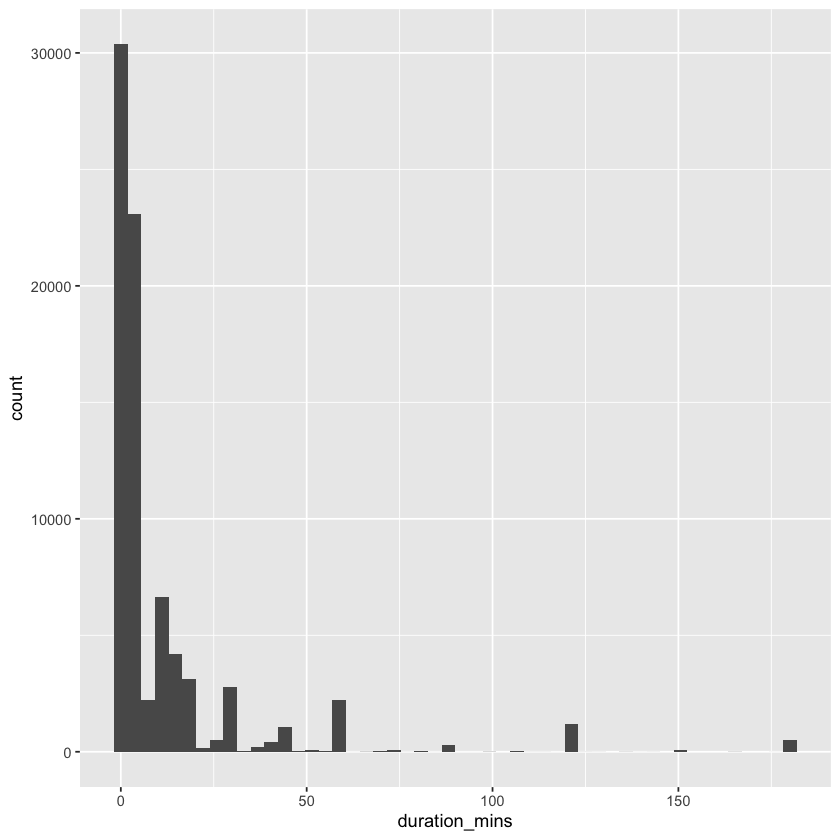

In [ ]:
# lets visualize this with a histogram but because there are a lot of outliers lets limit it to less than 3 hours

ufos %>%
   filter(duration_mins <= 180) %>%
   ggplot(aes(x = duration_mins)) +
   geom_histogram(bins = 50)

In [ ]:
ufos %>%
   group_by(year_incident) %>%
   reframe(total_sightings = n(),
           avg = mean(duration_mins, na.rm = TRUE),
           med = median(duration_mins, na.rm = TRUE))

year_incident,total_sightings,avg,med
<dbl>,<int>,<dbl>,<dbl>
1906,1,180.000000,180.000
1910,2,2.000000,2.000
1916,1,1.000000,1.000
1920,1,1.000000,1.000
1925,1,1.000000,1.000
1929,1,1.000000,1.000
1930,1,20.000000,20.000
1931,2,15.500000,15.500
1933,1,30.000000,30.000


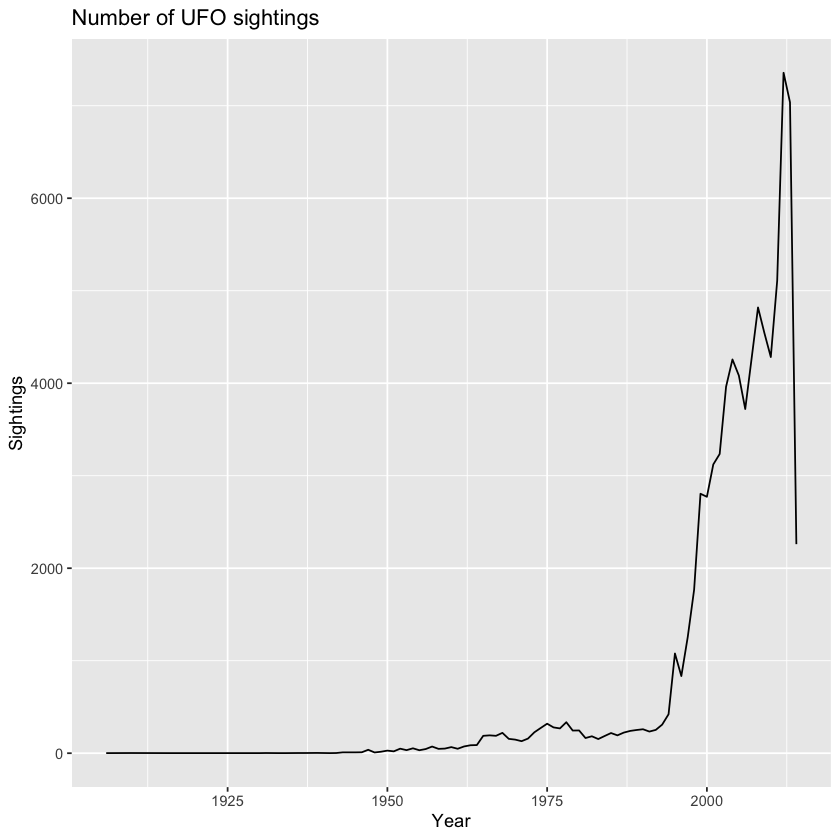

In [ ]:
# Now that we have the data we can plot a time series
# geom_line is a line graph

ufos %>%
   group_by(year_incident) %>%
   reframe(total_sightings = n()) %>%
   ggplot(aes(x = year_incident, y = total_sightings)) +
       geom_line() +
       labs(title = "Number of UFO sightings", x = "Year", y = "Sightings")

### What countries are listed as seeing the most UFOs by count and by duration?

In [ ]:
ufos %>%
   group_by(country) %>%
   reframe(num_sightings = n(),
           total_time = sum(duration_mins, na.rm = TRUE),
           avg = round(mean(duration_mins, na.rm = TRUE), 2),
           med = round(median(duration_mins, na.rm = TRUE), 2))

country,num_sightings,total_time,avg,med
<chr>,<int>,<dbl>,<dbl>,<dbl>
,9670,2161044.60,223.50,3
au,538,34131.29,63.44,3
ca,3000,1442971.61,480.99,2
de,105,42447.94,404.27,3
gb,1905,2097446.89,1101.02,3
us,65114,6294364.71,96.67,3


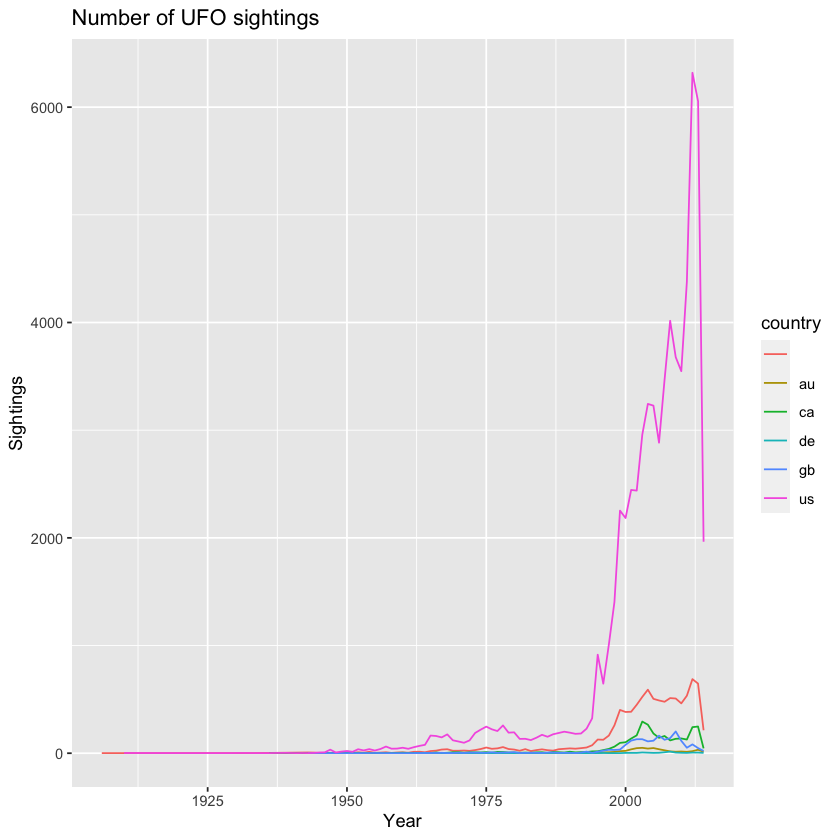

In [ ]:
# We have a few options to visualize this. The first would be a line graph

ufos %>%
   group_by(year_incident, country) %>%
   reframe(total_sightings = n(),
           avg = mean(duration_mins, na.rm = TRUE),
           med = median(duration_mins, na.rm = TRUE)) %>%
   ggplot(aes(x = year_incident, y = total_sightings, group = country, color = country)) +
       geom_line() +
       labs(title = "Number of UFO sightings", x = "Year", y = "Sightings")

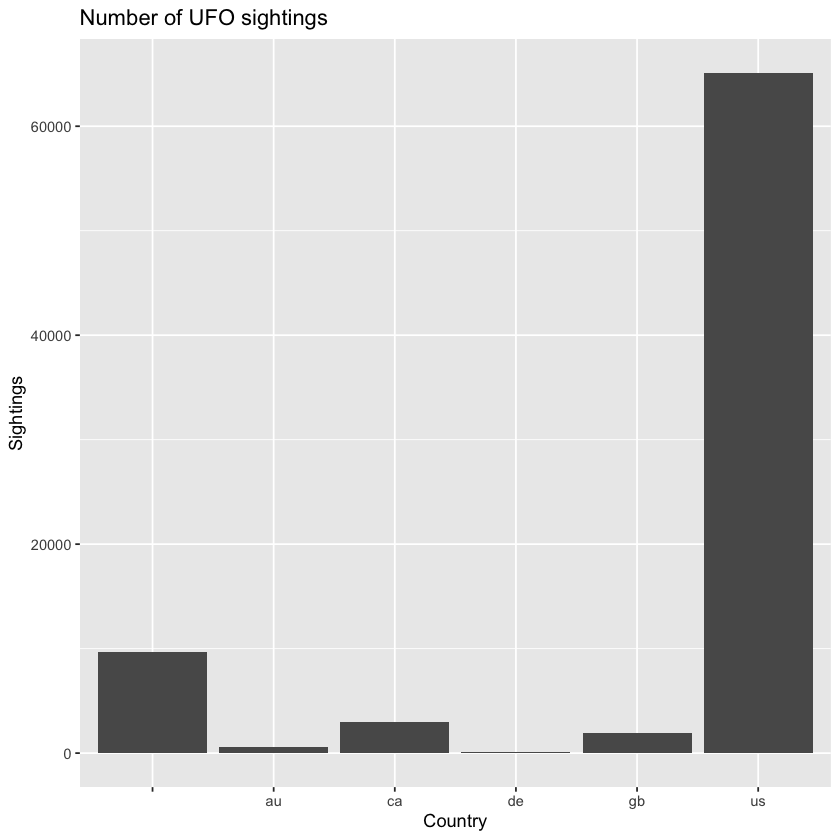

In [ ]:
# The second would be a bar graph

ufos %>%
   ggplot(aes(x = country)) +
       geom_bar() +
       labs(title = "Number of UFO sightings", x = "Country", y = "Sightings")

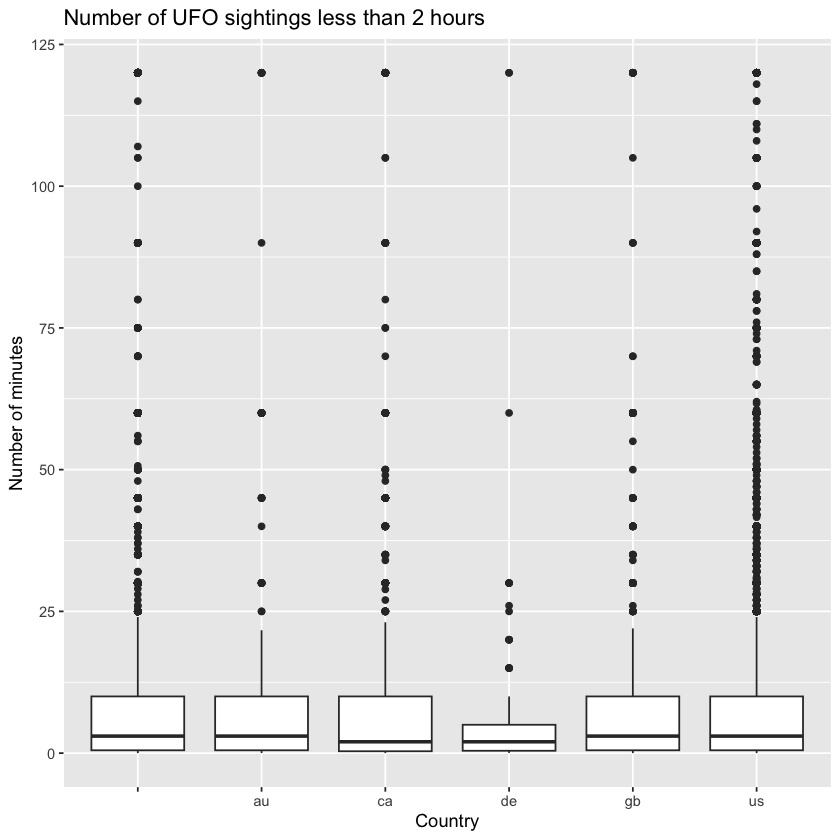

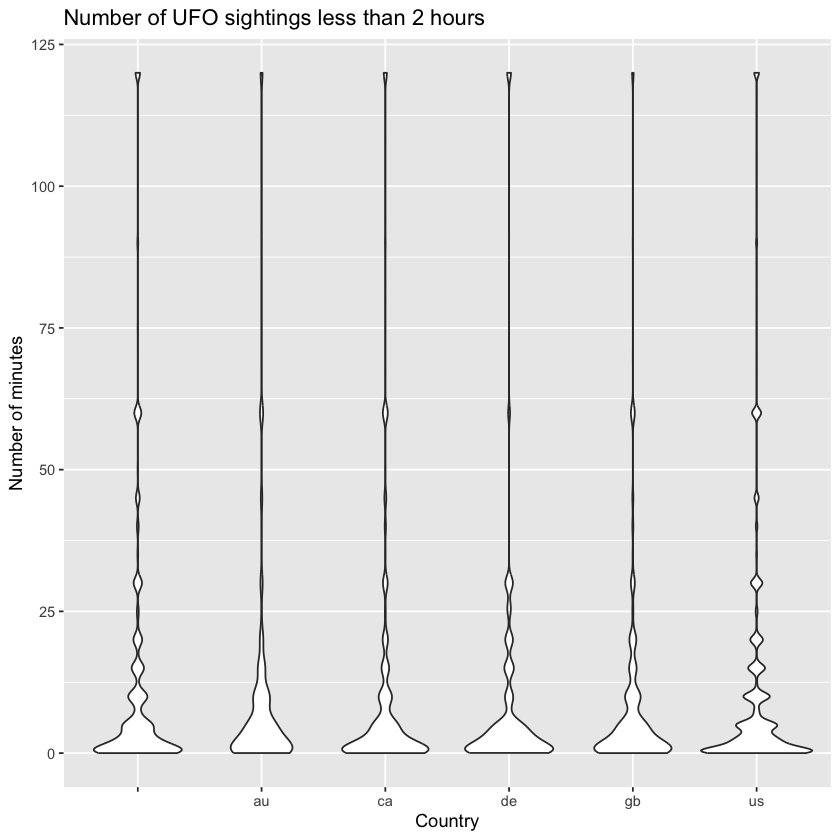

In [ ]:
# Finally we can use a box and whiskers plot or a violin plot.
# To make this more informative I'm going to remove the outliers (those that are over 2 hours minutes)

ufos %>%
   filter(duration_mins <= 120) %>%
   ggplot(aes(x = country, y = duration_mins)) +
       geom_boxplot() +
       labs(title = "Number of UFO sightings less than 2 hours", x = "Country", y = "Number of minutes")

ufos %>%
   filter(duration_mins <= 120) %>%
   ggplot(aes(x = country, y = duration_mins)) +
       geom_violin() +
       labs(title = "Number of UFO sightings less than 2 hours", x = "Country", y = "Number of minutes")

### What US states see the most UFOs by count and by duration?

In [ ]:
# we can also assign the new tables to variables

t <- ufos %>%
   filter(country == "us") %>%
   group_by(state) %>%
   reframe(num_sightings = n(),
           total_time = sum(duration_mins, na.rm = TRUE),
           avg = round(mean(duration_mins, na.rm = TRUE), 2),
           med = round(median(duration_mins, na.rm = TRUE), 2))

print("States with the most sightings")
head(t %>% arrange(desc(num_sightings)))

print("States with the most amount of UFO viewing time")
head(t %>% arrange(desc(total_time)))

print("States with the longest average sightings")
head(t %>% arrange(desc(avg)))

[1] "States with the most sightings"


state,num_sightings,total_time,avg,med
<chr>,<int>,<dbl>,<dbl>,<dbl>
ca,8912,502170.11,56.35,3
wa,3966,956492.96,241.17,2
fl,3835,932751.00,243.22,3
tx,3447,141554.20,41.07,3
ny,2980,149181.42,50.06,3
il,2499,36781.96,14.72,3


[1] "States with the most amount of UFO viewing time"


state,num_sightings,total_time,avg,med
<chr>,<int>,<dbl>,<dbl>,<dbl>
ar,588,1116516.9,1898.84,3
wa,3966,956493.0,241.17,2
fl,3835,932751.0,243.22,3
ca,8912,502170.1,56.35,3
az,2414,258415.1,107.09,5
va,1273,227293.5,178.55,3


[1] "States with the longest average sightings"


state,num_sightings,total_time,avg,med
<chr>,<int>,<dbl>,<dbl>,<dbl>
ar,588,1116516.9,1898.84,3
hi,262,112259.1,428.47,4
fl,3835,932751.0,243.22,3
wa,3966,956493.0,241.17,2
ct,892,210102.7,235.54,3
la,558,113963.7,204.24,3


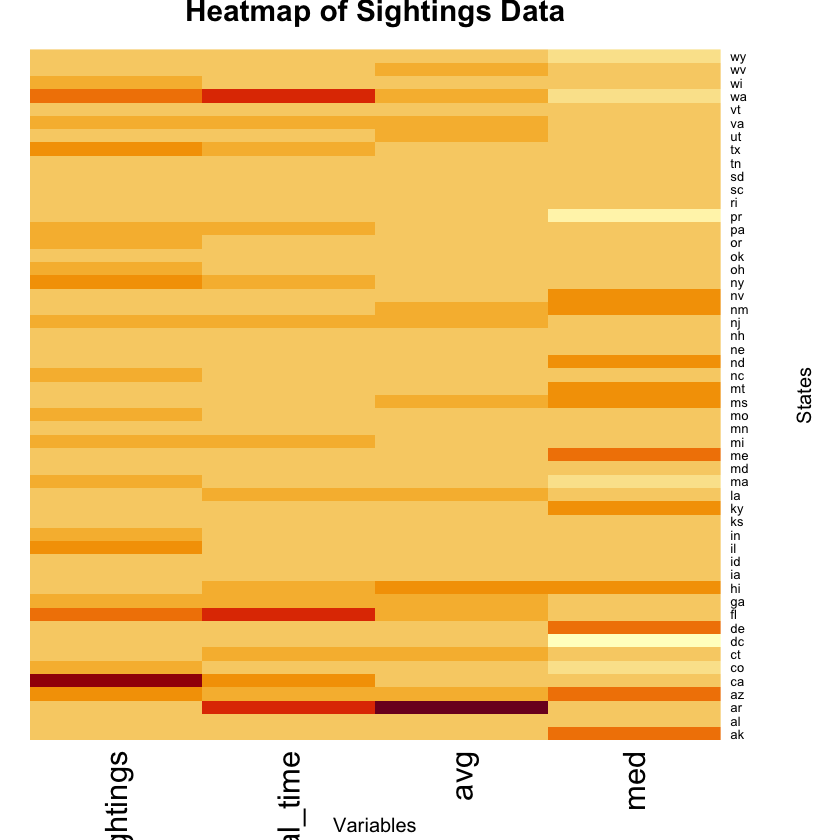

In [ ]:
# Visualizing it using a heatmap
# Heatmaps are not part of tidyverse but rather part of base R
# They use numeric matrices so we need to remove the state variable
# and add it back in as a row name

# remove state variable
numeric_data <- t[, c("num_sightings", "total_time", "avg", "med")]

# create matrix and add state back in as a row name
heatmap_dat <- as.matrix(numeric_data)
rownames(heatmap_dat) <- t$state

# function
heatmap(heatmap_dat,
        Rowv = NA, Colv = NA,
#        col = cm.colors(256),
        scale = "column",
        main = "Heatmap of Sightings Data",
        xlab = "Variables",
        ylab = "States"
        )

### What about the least number of sightings?

In [ ]:
# We can see the least numer of sightings by using tail instead of head or taking out `desc()`

print("States with the least sightings")
head(t %>% arrange(num_sightings))

print("States with the least amount of UFO viewing time")
head(t %>% arrange(total_time))

print("States with the shortest average sightings")
head(t %>% arrange(avg))



[1] "States with the least sightings"


state,num_sightings,total_time,avg,med
<chr>,<int>,<dbl>,<dbl>,<dbl>
dc,7,27.43,3.92,0.17
pr,25,437.66,17.51,1.00
nd,129,2376.04,18.42,4.00
de,166,2442.83,14.72,4.50
wy,175,4235.77,24.20,2.00
sd,183,8011.71,43.78,3.00


[1] "States with the least amount of UFO viewing time"


state,num_sightings,total_time,avg,med
<chr>,<int>,<dbl>,<dbl>,<dbl>
dc,7,27.43,3.92,0.17
pr,25,437.66,17.51,1.00
nd,129,2376.04,18.42,4.00
de,166,2442.83,14.72,4.50
wy,175,4235.77,24.20,2.00
vt,260,4449.06,17.11,3.00


[1] "States with the shortest average sightings"


state,num_sightings,total_time,avg,med
<chr>,<int>,<dbl>,<dbl>,<dbl>
dc,7,27.43,3.92,0.17
md,837,11647.71,13.92,3.00
de,166,2442.83,14.72,4.50
il,2499,36781.96,14.72,3.00
id,521,8067.10,15.48,3.00
ia,678,10584.70,15.61,3.00


### What is the most seen UFO shape in the USA by count and duration?

In [ ]:
t <- ufos %>%
  filter(country == "us") %>%
   group_by(shape) %>%
   reframe(num_sightings = n(),
           total_time = sum(duration_mins, na.rm = TRUE),
           avg = round(mean(duration_mins, na.rm = TRUE), 2),
           med = round(median(duration_mins, na.rm = TRUE), 2))

print("Most seen UFO shape by number of sightings")
head(t %>% arrange(desc(num_sightings)))

print("Most seen UFO shape by total time")
head(t %>% arrange(desc(total_time)))


[1] "Most seen UFO shape by number of sightings"


shape,num_sightings,total_time,avg,med
<chr>,<int>,<dbl>,<dbl>,<dbl>
light,13473,3411988.3,253.25,3
triangle,6549,157986.1,24.12,3
unknown,6120,914048.0,149.40,3
circle,6118,385157.5,62.95,3
fireball,5148,364025.3,70.71,2
other,4476,302856.0,67.66,3


[1] "Most seen UFO shape by total time"


shape,num_sightings,total_time,avg,med
<chr>,<int>,<dbl>,<dbl>,<dbl>
light,13473,3411988.3,253.25,3
unknown,6120,914048.0,149.40,3
circle,6118,385157.5,62.95,3
fireball,5148,364025.3,70.71,2
other,4476,302856.0,67.66,3
triangle,6549,157986.1,24.12,3


In [ ]:
colnames(ufos)

[1] "date_of_incident"    "city"                "state"              
 [4] "country"             "shape"               "duration_seconds"   
 [7] "comments"            "date_posted"         "latitude"           
[10] "longitude"           "duration_mins"       "duration_hrs"       
[13] "year_incident"       "month_incident"      "hour_incident"      
[16] "day_of_week"         "week_of_year"        "quarter_of_incident"

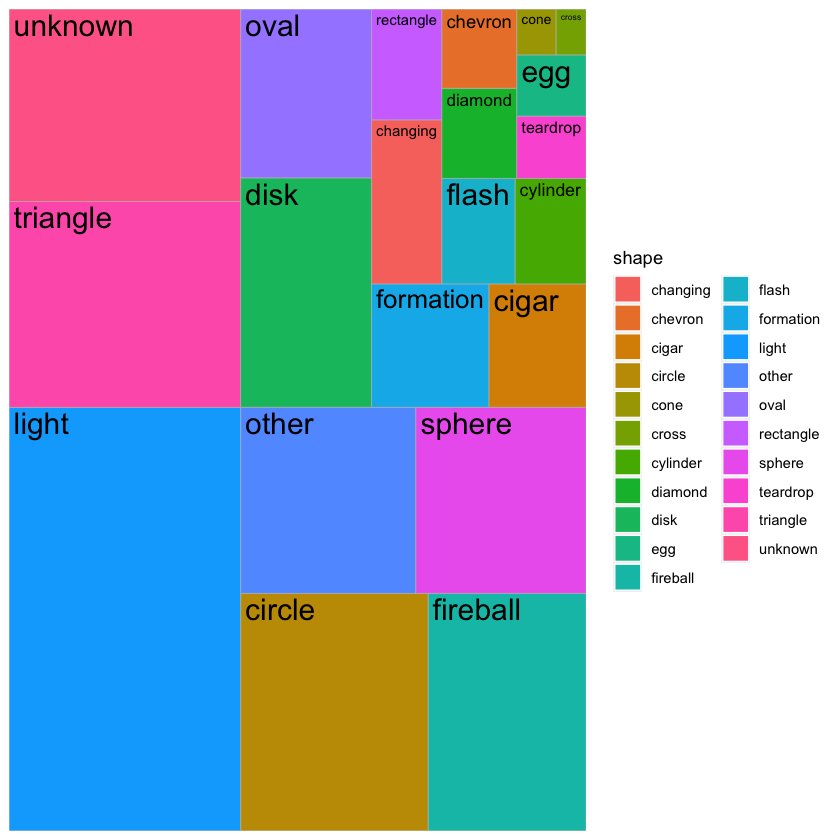

In [ ]:
# install.packages(treemapify)
library(treemapify)

ufos %>%
  filter(country == "us") %>%
  group_by(shape) %>%
  reframe(num_sightings = n()) %>%
  ggplot(aes(area = num_sightings, fill = shape, label = shape)) +
  geom_treemap() +
  geom_treemap_text()

### What shapes are you most likely to see in New York?

In [ ]:
t <- ufos %>%###
   filter(state == "ny") %>%
   group_by(shape) %>%
   reframe(num_sightings = n(),
           total_time = sum(duration_mins, na.rm = TRUE),
           avg = round(mean(duration_mins, na.rm = TRUE), 2),
           med = round(median(duration_mins, na.rm = TRUE), 2))

print("Most seen UFO shape in NYS by number of sightings")
head(t %>% arrange(desc(num_sightings)))

print("Most seen UFO shape in NYS by total time")
head(t %>% arrange(desc(total_time)))

print("Most seen UFO shape in NYS by average duration")
head(t %>% arrange(desc(avg)))


[1] "Most seen UFO shape in NYS by number of sightings"


shape,num_sightings,total_time,avg,med
<chr>,<int>,<dbl>,<dbl>,<dbl>
light,622,122361.83,196.72,3
circle,331,6048.13,18.27,4
triangle,314,3536.84,11.26,3
unknown,280,5664.80,20.23,3
fireball,240,1697.82,7.07,2
disk,239,2549.90,10.67,3


[1] "Most seen UFO shape in NYS by total time"


shape,num_sightings,total_time,avg,med
<chr>,<int>,<dbl>,<dbl>,<dbl>
light,622,122361.83,196.72,3
circle,331,6048.13,18.27,4
unknown,280,5664.80,20.23,3
triangle,314,3536.84,11.26,3
sphere,191,2967.01,15.53,3
other,215,2599.14,12.09,3


[1] "Most seen UFO shape in NYS by average duration"


shape,num_sightings,total_time,avg,med
<chr>,<int>,<dbl>,<dbl>,<dbl>
light,622,122361.83,196.72,3
unknown,280,5664.80,20.23,3
changing,73,1408.20,19.29,5
circle,331,6048.13,18.27,4
sphere,191,2967.01,15.53,3
rectangle,53,698.95,13.19,3


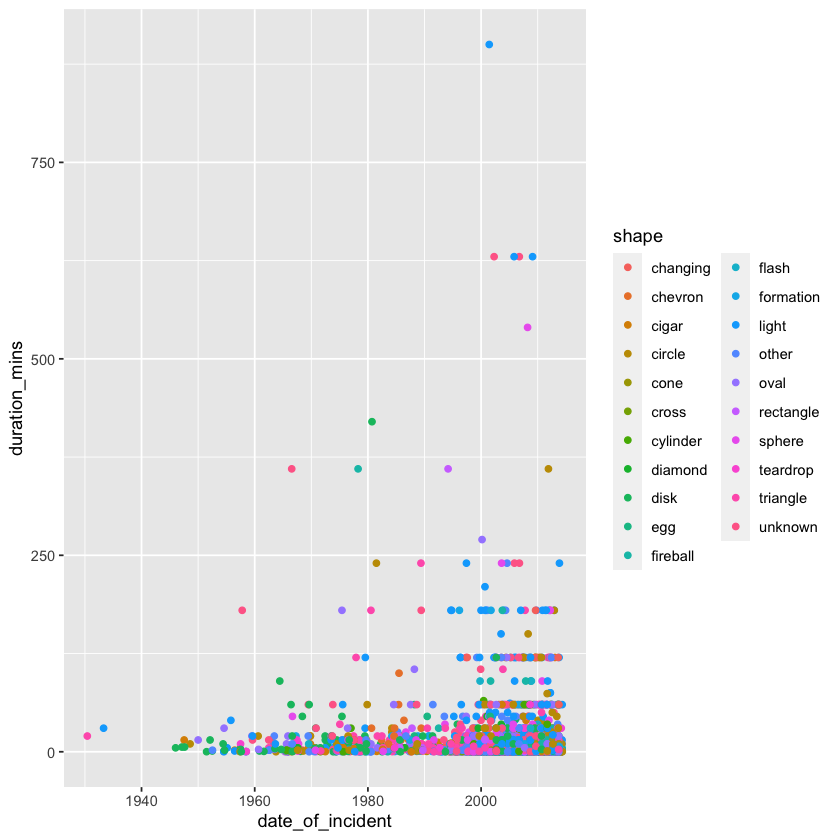

In [ ]:
# we can create a scatterplot for this and change attributes of the dots to show different shapes
# To make it more informatiive I'm going to filter out the one outlier

ufos %>%
   filter(state == "ny") %>%
   filter(duration_mins < 1000) %>%
   ggplot(aes(x = date_of_incident, y = duration_mins, color = shape)) +
   geom_point()

### When are you most likely to see a UFO?

day_of_week,n,avg,median,max
<ord>,<int>,<dbl>,<dbl>,<dbl>
Sun,11791,257.86,3,1104600.0
Mon,10094,105.10,3,420800.0
Tue,10777,59.80,3,175440.0
Wed,10964,38.68,3,80640.0
Thu,11024,211.77,3,1380000.0
Fri,11620,120.10,3,877053.3
Sat,14062,225.64,3,1630600.0


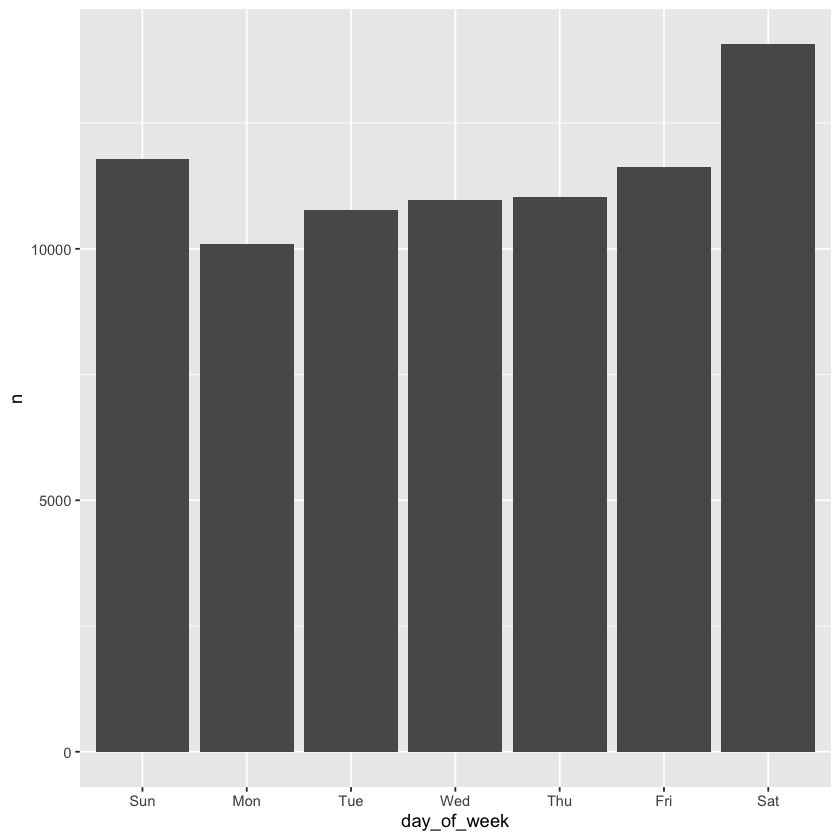

In [ ]:
# Is there a day of the week when UFOs are most likely to be seen?

ufos %>%
   group_by(day_of_week) %>%
   reframe(n = n(),
           avg = round(mean(duration_mins, na.rm = TRUE), 2),
           median = median(duration_mins, na.rm = TRUE),
           max = max(duration_mins, na.rm = TRUE))

# we can visualize this with geom_col (like geom_bar but you can specify y)

ufos %>%
   group_by(day_of_week) %>%
   reframe(n = n(),
           avg = mean(duration_mins, na.rm = TRUE)) %>%
   ggplot(aes(x = day_of_week, y = n)) +
   geom_col()


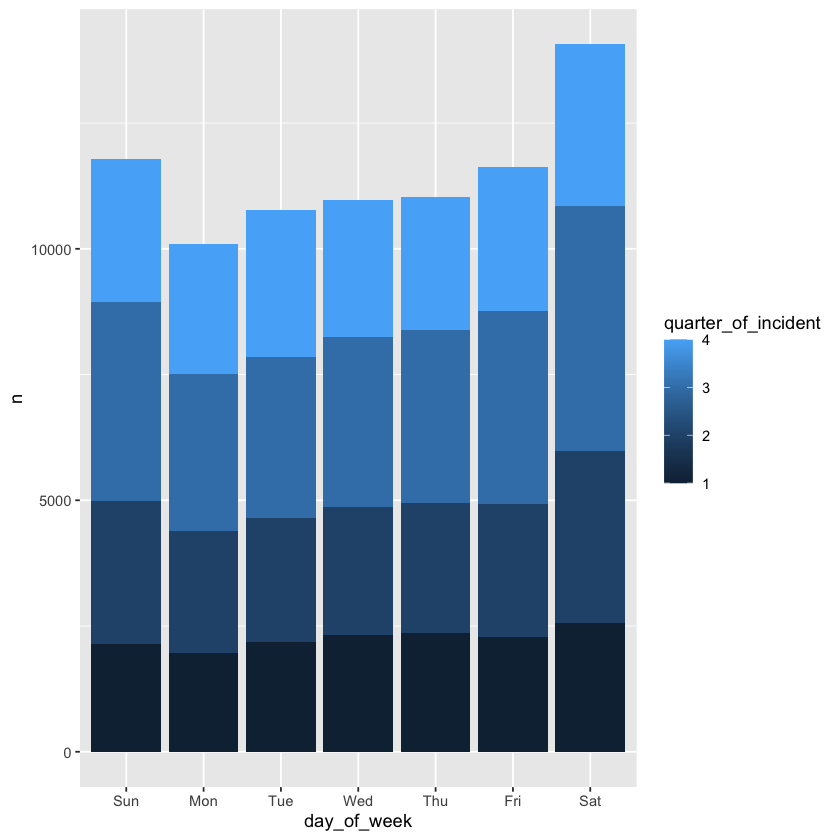

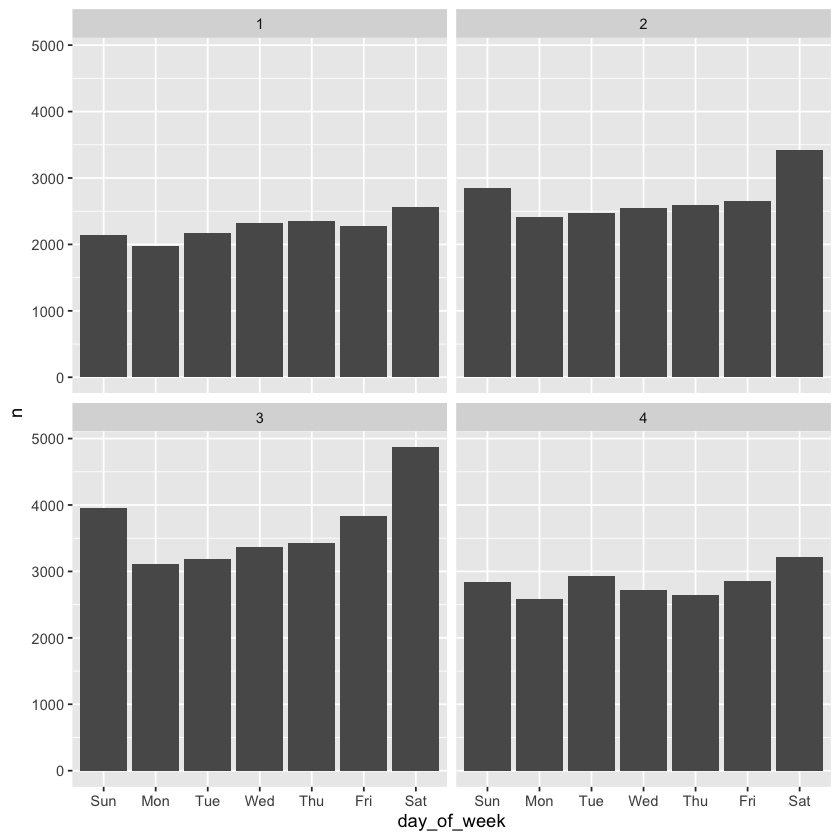

In [ ]:
# We can also go farther and use color to make the bar graph more informative. What if I wanted to know
# if there was a quarter I was more likely to see ufos?

ufos %>%
   group_by(day_of_week, quarter_of_incident) %>%
   reframe(n = n(),
           avg = mean(duration_mins, na.rm = TRUE)) %>%
   ggplot(aes(x = day_of_week, y = n, fill = quarter_of_incident)) +
   geom_col()

# We can also facet which might be more helpful

ufos %>%
   group_by(day_of_week, quarter_of_incident) %>%
   reframe(n = n(),
           avg = mean(duration_mins, na.rm = TRUE)) %>%
   ggplot(aes(x = day_of_week, y = n)) +
   geom_col() +
   facet_wrap(~ quarter_of_incident)


In [ ]:
# Is there an hour you're most likely going to see UFOs in the United States? And how does that shift with geography?
# Because there are 50 states, I'm going to create a variable for regions in a new dataframe (9 regions)

ufos_usa <- ufos
ufos_usa$region <- NA_character_

ufos_usa <- ufos_usa %>%
  filter(country == "us") %>%
  mutate(region = ifelse(state %in% c("ct", "me", "ma", "nh", "ri", "vt"), "new_england", region),
         region = ifelse(state %in% c("nj", "ny", "pa"), "mid_atlantic", region),
         region = ifelse(state %in% c("il", "in", "mi", "oh", "wi"), "east_north_central", region),
         region = ifelse(state %in% c("ia", "ks", "mn", "mt", "ne", "nd", "sd"), "west_north_central", region),
         region = ifelse(state %in% c("de", "fl", "ga", "md", "nc", "sc", "va", "dc", "wv"), "south_atlantic", region),
         region = ifelse(state %in% c("al", "ky", "ms", "tn"), "east_south_central", region),
         region = ifelse(state %in% c("ar", "la", "ok", "tx"), "west_south_central", region),
         region = ifelse(state %in% c("az", "co", "id", "mo", "nv", "nm", "ut", "wy"), "mountain", region),
         region = ifelse(state %in% c("ak", "ca", "hi", "or", "wa"), "pacific", region))

# just test that it works
ufos_usa %>%
  group_by(region) %>%
  reframe(n = n())

region,n
<chr>,<int>
east_north_central,9130
east_south_central,2991
mid_atlantic,6601
mountain,8126
new_england,3680
pacific,15206
south_atlantic,10564
west_north_central,3474
west_south_central,5317


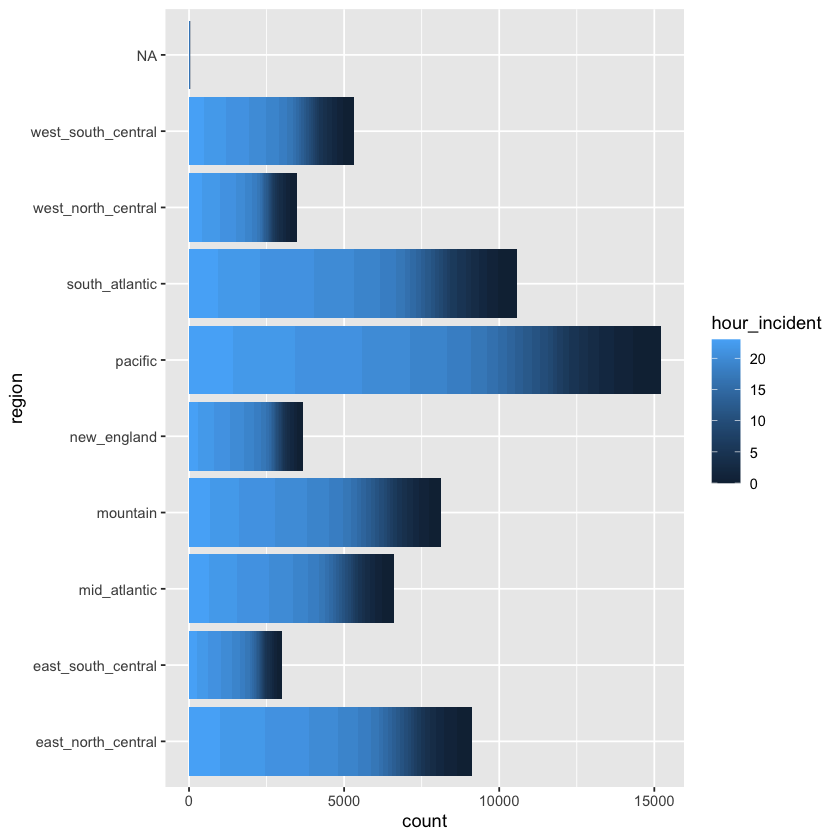

In [ ]:
ufos_usa %>%
   ggplot(aes(x = region, group = hour_incident, fill = hour_incident)) +
   geom_bar() +
   coord_flip()


# What have we learned? Where can we go from here?

I think this shows that you are most likely to see a UFO in the most populated areas in the United States, at night, between Thursday and Sunday. Most sightings are quick and only seen as bursts of light. We can test this by getting a population dataset and doing correlations on it. We could also go deeper and look at the distance between sightings and airports and military installations.

What surprised me is that the mountain region (which includes the southeast USA doesn't have the most sightings and falls behind the West Coast, East Coast and eastern Midwest regions. This does make me think that it's probably more population based than anything else.